# Starbucks Capstone Challenge

### 1. Project Overview
This project is part of Udacity's Data Science Nanodegree which contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. This project aims to build a machine learning model to determine which demographic groups are more likely to complete an offer and predict how much someone will spend. Not all users receive the same offer, and that is the challenge to solve with this data sets.
<table>
    <tr>
        <td>
            <img src="https://opj.ca/wp-content/uploads/2018/02/New-Starbucks-Logo-1200x969.jpg" width="100" height="100">
        </td>
        <td> & </td>
        <td>
            <img src='./assets/udacity.png' width="150" height="150">
        </td>
    </tr>
</table>



### 2. Problem Statement

The basic task was to build a model to identify whether or not someone will respond to an offer? I think The user's behavior depends on the user's characteristics and Starbucks's reward methods. so I will try to understand hidden relationships in the transaction, demographic, and offer data. I will try to find Which factors are important for customers?

Whether the user will complete the transaction is a classification issue. For classification problems, we often use "Accuracy" as a measure. And our ultimate goal is to increase the overall turnover. So I think I should put in the probability factor, start with the overall situation of consumer transactions and find the target group with the highest probability.

I will try to use TensorFlow to build a prediction model to predict how much someone will spend. this is regression task, So I will use Mean-Squared Error to reduce the model error. 

### 3. Metrics
- **Accuracy** :  Whether the user will complete the transaction?
- **MSE** :  How much someone will spend?

### 4. Data Exploration

In [ ]:
import pandas as pd
import numpy as np
import math
import json
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

In [2]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

---

**Explorate portfolio.json**:

* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

In [3]:
 portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [4]:
print('How many NaN value in portfolio dataset? {}'\
      .format(portfolio.isna().sum().sum()))

How many NaN value in portfolio dataset? 0


- There isn't missing value in the portfolio data set. 

In [5]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
reward        10 non-null int64
channels      10 non-null object
difficulty    10 non-null int64
duration      10 non-null int64
offer_type    10 non-null object
id            10 non-null object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [6]:
portfolio.channels.value_counts()

[web, email, mobile, social]    4
[web, email, mobile]            3
[email, mobile, social]         2
[web, email]                    1
Name: channels, dtype: int64

In [7]:
portfolio.offer_type.value_counts()

discount         4
bogo             4
informational    2
Name: offer_type, dtype: int64

- The **portfolio** has two categorical columns, 'channels' and 'offer_type'. The 'channels' column has 4 categories, 'web', 'email', 'mobile', 'social'. The 'offer_type' has 3 types, 'bogo','discount','informational'. I think they are important features need to be one-hot coding.  

In [8]:
def clean_portfolio(df=portfolio):
    '''
    INPUT: 
        df(DataFrame): portfolio dataset
    OUTPUT:
        new_df(DataFrame): cleaned data 
    '''
    channels_dummies = portfolio["channels"].str.join(sep="*").str.get_dummies(sep="*")
    offer_type_dummies = pd.get_dummies(portfolio['offer_type'])
    new_df = pd.concat([df, channels_dummies, offer_type_dummies], axis=1).drop(['channels','offer_type'], axis=1)
    new_df = new_df.rename(columns = {'id': 'offer_id'})
    columns_order = ["offer_id", "difficulty", "duration", "reward", "email", "mobile", "social", "web", "bogo", "discount", "informational"]
    return new_df[columns_order]

new_portfolio = clean_portfolio()
new_portfolio

,offer_id,difficulty,duration,reward,email,mobile,social,web,bogo,discount,informational
0,ae264e3637204a6fb9bb56bc8210ddfd,10,7,10,1,1,1,0,1,0,0
1,4d5c57ea9a6940dd891ad53e9dbe8da0,10,5,10,1,1,1,1,1,0,0
2,3f207df678b143eea3cee63160fa8bed,0,4,0,1,1,0,1,0,0,1
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,7,5,1,1,0,1,1,0,0
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,20,10,5,1,0,0,1,0,1,0
5,2298d6c36e964ae4a3e7e9706d1fb8c2,7,7,3,1,1,1,1,0,1,0
6,fafdcd668e3743c1bb461111dcafc2a4,10,10,2,1,1,1,1,0,1,0
7,5a8bc65990b245e5a138643cd4eb9837,0,3,0,1,1,1,0,0,0,1
8,f19421c1d4aa40978ebb69ca19b0e20d,5,5,5,1,1,1,1,1,0,0
9,2906b810c7d4411798c6938adc9daaa5,10,7,2,1,1,0,1,0,1,0


- Now, The cleaned **portfolio** has one 'offer_id' is outer-key with **profile** and **transcript**. The other columns describe what kind of offer is.

---
**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

In [9]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [10]:
print('How many NaN value in profile dataset? {}'.format(profile.isna().sum().sum()))
profile.isnull().sum()

How many NaN value in profile dataset? 4350


gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

- This file is the member's information. There are 4350 missing values in data set. The machine learning model is unable to process data sets that contain missing values. There are 2175 null values in the 'Gender' column and 'income' column respectively. I need to check them.

In [11]:
profile[(profile['gender'].isnull())&(profile['income'].isnull())]

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,None,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
...,...,...,...,...,...
16980,None,118,5c686d09ca4d475a8f750f2ba07e0440,20160901,NaN
16982,None,118,d9ca82f550ac4ee58b6299cf1e5c824a,20160415,NaN
16989,None,118,ca45ee1883624304bac1e4c8a114f045,20180305,NaN
16991,None,118,a9a20fa8b5504360beb4e7c8712f8306,20160116,NaN


- It is interesting to note the 'gender' column is None , the 'age' is 118 and the 'incoming' is NaN. Maybe this is some kind of default setting. So I think I need to check the percentage of NaN values. If the percentage is not high, I can delete directly.

In [ ]:
print('There are {:.2f} % NaN value in profile'\
      .format(((profile[(profile['gender'].isnull())&(profile['income'].isnull())].shape[0]/profile.shape[0])*100)))


- In this case, the proportion of mission value is not high, I think deleting NaN value is better than the method of filling.

- The 'gender' is categorical datatype, so I need to code it. 
- The 'became_member_on' is time data type. In this case, I think the continuous time data is not necessary for the machine learning model, so I convert it to 'days'. 

In [12]:
def clean_profile(df=profile):
    '''
    INPUT: 
        df(DataFrame): profile dataset
    OUTPUT:
        new_df(DataFrame): cleaned data 
    '''
    df = df.copy()
    df = df.dropna()
    df['became_member_on'] = pd.to_datetime(df['became_member_on'], format = '%Y%m%d')
    df['member_days'] = (datetime.datetime.today().date() - df['became_member_on'].dt.date).dt.days
    df = df.drop(['became_member_on'], axis=1)
    
    gender_dummies = pd.get_dummies(df['gender'])
    df = pd.concat([df, gender_dummies], axis=1).drop(['gender'], axis=1)
   
    df = df.rename(columns = {'id': 'customer_id', 'F': 'female', 'M': 'male', 'O': 'gender_o'})
    columns_order = ['customer_id', 'female', 'male','gender_o','age', 'income', 'member_days']

    return df[columns_order]

In [13]:
new_profile = clean_profile()
new_profile.head()

,customer_id,female,male,gender_o,age,income,member_days
1,0610b486422d4921ae7d2bf64640c50b,1,0,0,55,112000.0,1172
3,78afa995795e4d85b5d9ceeca43f5fef,1,0,0,75,100000.0,1239
5,e2127556f4f64592b11af22de27a7932,0,1,0,68,70000.0,887
8,389bc3fa690240e798340f5a15918d5c,0,1,0,65,53000.0,963
12,2eeac8d8feae4a8cad5a6af0499a211d,0,1,0,58,51000.0,1053


- Now that the profile data has been cleaned , I will check the 'age' distribution, 'income' distribution, and 'membership days' distribution of the members by data visualization.

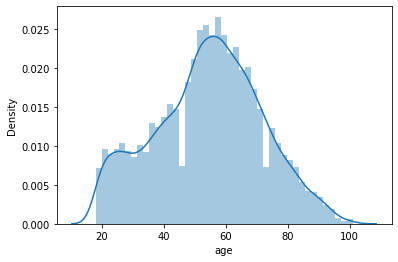

In [16]:
sns.distplot(a=new_profile['age'], kde=True);

In [20]:
new_profile['age'].describe()

count    14825.000000
mean        54.393524
std         17.383705
min         18.000000
25%         42.000000
50%         55.000000
75%         66.000000
max        101.000000
Name: age, dtype: float64

- From the data and graphs, I can see that the age of our members is normally distributed. 68% of members are between the ages of 38 and 72. The age of our members is related to the way Starbucks promotes through which channels.

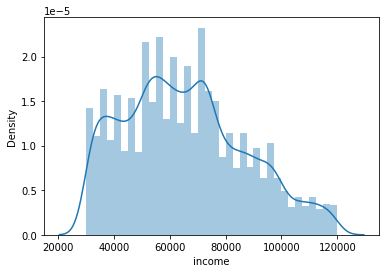

In [19]:
sns.distplot(a=new_profile['income'], kde=True);

In [22]:
new_profile['income'].describe()

count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000
Name: income, dtype: float64

- The average income of our members is 64,000. Maybe there is a hidden relationship between members' income and their behavior, so I need to check it enough.

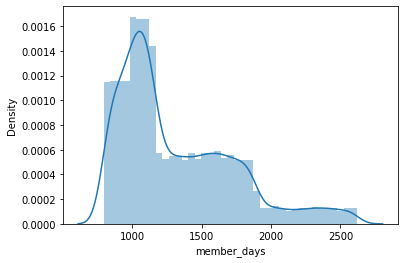

In [25]:
sns.distplot(a=new_profile['member_days'], kde=True);

In [27]:
new_profile['member_days'].describe()

count    14825.000000
mean      1318.478988
std        419.205158
min        796.000000
25%       1004.000000
50%       1154.000000
75%       1593.000000
max       2619.000000
Name: member_days, dtype: float64

- At present, I have not found any relationship between the number of days of membership and the purchase behavior of customers. But I think I can compare the expenditure of new members with that of old members.

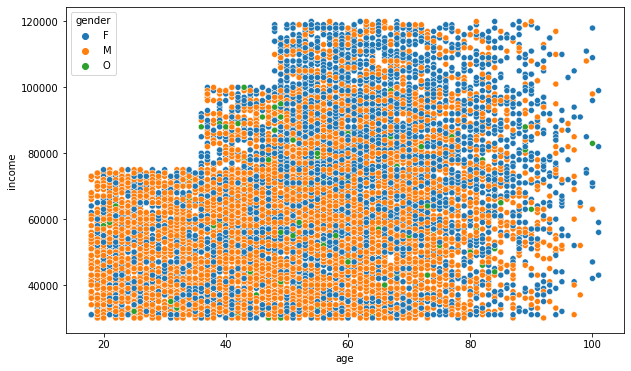

In [28]:
plt.figure(figsize=(10,6))

x =  new_profile['age']
y =  new_profile['income']
hue = profile['gender']
sns.scatterplot(x=x, y=y, hue=hue);

In [45]:
new_profile[['female','male','gender_o']].sum()

female      6129
male        8484
gender_o     212
dtype: int64

In [44]:
members = new_profile[['female','male','gender_o']].sum().sum()
male_ratio = new_profile[['female','male','gender_o']].sum().male/members
female_ratio = new_profile[['female','male','gender_o']].sum().female/members
other_ratio = new_profile[['female','male','gender_o']].sum().gender_o/members

print('There are {:.2f} % male in members'.format(male_ratio*100))
print('There are {:.2f} % female in members'.format(female_ratio*100))
print('There are {:.2f} % other in members'.format(other_ratio*100))

There are 57.23 % male in members
There are 41.34 % female in members
There are 1.43 % other in members


In [56]:
print('The average annual income of male members is {:.2f}'\
      .format(new_profile[new_profile['female'] == 1].income.mean()))
print('The average annual income of female members is {:.2f}'\
      .format(new_profile[new_profile['male'] == 1].income.mean()))
print('The average annual income of other members is {:.2f}'\
      .format(new_profile[new_profile['gender_o'] == 1].income.mean()))

The average annual income of male members is 71306.41
The average annual income of female members is 61194.60
The average annual income of other members is 63287.74


- From the age distribution, gender distribution ,and income distribution, Male members had the highest statistics. Male members account for 57.23% and their average annual income is 713,061. However, we are unable to conclude at this time that male members are our main customer group. Because there was no statistically significant difference compared to female members. Therefore, we may need to consider neutral advertising design when promoting sales.

- Since there are no significant statistical differences, I will not consider gender differences too much in subsequent machine learning designs.

---

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record


In [57]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [58]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
person    306534 non-null object
event     306534 non-null object
value     306534 non-null object
time      306534 non-null int64
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


- **Transcript** contains transaction information. the person is customer's id need to be rename. the 'value' contains 'offer id', I think I could link the **Portfolio** with the offer ID.

In [60]:
transcript.isnull().sum()

person    0
event     0
value     0
time      0
dtype: int64

 -  There is no missing value in transcript.

In [62]:
transcript.time.describe()

count    306534.000000
mean        366.382940
std         200.326314
min           0.000000
25%         186.000000
50%         408.000000
75%         528.000000
max         714.000000
Name: time, dtype: float64

 - The time in hours since start of test. I will convert hours to days to keep the units of time consistent. 

In [63]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

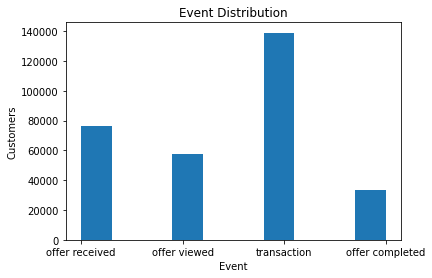

In [65]:
plt.hist(transcript['event'], bins = 10);
plt.xlabel('Event');
plt.ylabel('Customers');
plt.title('Event Distribution');

- There are four events to record the description. 'Transaction' are the most records. Of course, this event will be recorded as long as customers have a transaction, and this event is correlated with whether the offer is received or not, but there is no causation.
- The three events associated with the offer are ordinal data. I think the 'offer viewed','offer completed' condition are both true ,then the offer is judged to be effective promotion.

- I will design a classification Machine learning model and set accuracy as a metric. Our goal is to increase the overall turnover. So I should think about the demographic groups, not just one customer. 

In [66]:
transcript.value

0         {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1         {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2         {'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3         {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4         {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
                                ...                       
306529                      {'amount': 1.5899999999999999}
306530                                    {'amount': 9.53}
306531                                    {'amount': 3.61}
306532                      {'amount': 3.5300000000000002}
306533                                    {'amount': 4.05}
Name: value, Length: 306534, dtype: object

In [68]:
transcript[transcript.event=='transaction'].head(10).value

12654    {'amount': 0.8300000000000001}
12657                 {'amount': 34.56}
12659                 {'amount': 13.23}
12670                 {'amount': 19.51}
12671                 {'amount': 18.97}
12678                  {'amount': 33.9}
12686                  {'amount': 0.22}
12687                 {'amount': 18.59}
12691                 {'amount': 18.01}
12696                 {'amount': 19.11}
Name: value, dtype: object

In [70]:
transcript[transcript.event=='offer received'].head(10).value

0    {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1    {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2    {'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3    {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4    {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
5    {'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}
6    {'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}
7    {'offer id': '3f207df678b143eea3cee63160fa8bed'}
8    {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
9    {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
Name: value, dtype: object

In [72]:
transcript[transcript.event=='offer viewed'].head(10).value

12650    {'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}
12651    {'offer id': '5a8bc65990b245e5a138643cd4eb9837'}
12652    {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
12653    {'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}
12655    {'offer id': '5a8bc65990b245e5a138643cd4eb9837'}
12656    {'offer id': '2906b810c7d4411798c6938adc9daaa5'}
12660    {'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}
12661    {'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}
12662    {'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}
12663    {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
Name: value, dtype: object

In [73]:
transcript[transcript.event=='offer completed'].head()

,person,event,value,time
12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,0
12672,fe97aa22dd3e48c8b143116a8403dd52,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,0
12679,629fc02d56414d91bca360decdfa9288,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,0
12692,676506bad68e4161b9bbaffeb039626b,offer completed,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,0
12697,8f7dd3b2afe14c078eb4f6e6fe4ba97d,offer completed,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...,0


In [74]:
transcript[transcript.event=='offer completed'].head(10).value

12658    {'offer_id': '2906b810c7d4411798c6938adc9daaa5...
12672    {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...
12679    {'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...
12692    {'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...
12697    {'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...
12717    {'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...
12721    {'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...
12744    {'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d...
12764    {'offer_id': '2906b810c7d4411798c6938adc9daaa5...
12767    {'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...
Name: value, dtype: object

- event : One-hot code 4 events.
- value : Extract the key and value, I noticed that there are two ways 'offer id', 'offer_id' to represent the offer id in the dictionary.
- time : 'Hour' converts to 'Day' Unit

In [77]:
def clean_transcript(df = transcript):
    '''
    INPUT: 
        df(DataFrame): transcript dataset
    OUTPUT:
        new_df(DataFrame): cleaned data 
    '''
    df = df.copy()
    event_dummies = pd.get_dummies(df['event'])
    new_df = pd.concat([df, event_dummies], axis=1).drop(['event'], axis=1)
    
    new_df['offer_id'] = df.value.\
    apply(lambda x: list(x.values())[0] if list(x.keys())[0] in ['offer id', 'offer_id'] else 0)
    
    new_df['amount'] = df.value.apply(lambda x: x.get('amount', 0))

    new_df['reward'] = df.value.apply(lambda x: x.get('reward', 0))

    new_df['time'] = round(df.time/24)
    
    new_df.drop(['value'], axis=1, inplace=True)
    
    new_df = new_df.rename(columns = {'person': 'customer_id','offer received':'offer_received',\
                                      'offer viewed':'offer_viewed','offer completed':'offer_completed'})
    
    columns_order = ['customer_id','offer_id','time',\
                     'offer_received', 'offer_viewed','offer_completed','reward',\
                     'transaction','amount']
    
    return new_df[columns_order]

In [78]:
new_transcript = clean_transcript()
new_transcript

,customer_id,offer_id,time,offer_received,offer_viewed,offer_completed,reward,transaction,amount
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,1,0,0,0,0,0.00
1,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,1,0,0,0,0,0.00
2,e2127556f4f64592b11af22de27a7932,2906b810c7d4411798c6938adc9daaa5,0.0,1,0,0,0,0,0.00
3,8ec6ce2a7e7949b1bf142def7d0e0586,fafdcd668e3743c1bb461111dcafc2a4,0.0,1,0,0,0,0,0.00
4,68617ca6246f4fbc85e91a2a49552598,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,1,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,0,30.0,0,0,0,0,1,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,0,30.0,0,0,0,0,1,9.53
306531,a00058cf10334a308c68e7631c529907,0,30.0,0,0,0,0,1,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,0,30.0,0,0,0,0,1,3.53


- Check the new transcript if the offer id is extracted

In [79]:
 transcript.iloc[12658].value

{'offer_id': '2906b810c7d4411798c6938adc9daaa5', 'reward': 2}

In [80]:
new_transcript.iloc[12658]

customer_id        9fa9ae8f57894cc9a3b8a9bbe0fc1b2f
offer_id           2906b810c7d4411798c6938adc9daaa5
time                                              0
offer_received                                    0
offer_viewed                                      0
offer_completed                                   1
reward                                            2
transaction                                       0
amount                                            0
Name: 12658, dtype: object

- Check 'Hour' converts to 'Day' Unit

In [83]:
transcript.iloc[306530].time

714

In [84]:
new_transcript.iloc[306530].time

30.0

### 5. Data Preprocessing

At this point, I have cleaned up the three data sets separately and finally got the following results. Later I need to combina data sets for the machine learning model.

In [85]:
new_transcript

,customer_id,offer_id,time,offer_received,offer_viewed,offer_completed,reward,transaction,amount
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,1,0,0,0,0,0.00
1,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,1,0,0,0,0,0.00
2,e2127556f4f64592b11af22de27a7932,2906b810c7d4411798c6938adc9daaa5,0.0,1,0,0,0,0,0.00
3,8ec6ce2a7e7949b1bf142def7d0e0586,fafdcd668e3743c1bb461111dcafc2a4,0.0,1,0,0,0,0,0.00
4,68617ca6246f4fbc85e91a2a49552598,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,1,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,0,30.0,0,0,0,0,1,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,0,30.0,0,0,0,0,1,9.53
306531,a00058cf10334a308c68e7631c529907,0,30.0,0,0,0,0,1,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,0,30.0,0,0,0,0,1,3.53


In [86]:
new_profile

,customer_id,female,male,gender_o,age,income,member_days
1,0610b486422d4921ae7d2bf64640c50b,1,0,0,55,112000.0,1172
3,78afa995795e4d85b5d9ceeca43f5fef,1,0,0,75,100000.0,1239
5,e2127556f4f64592b11af22de27a7932,0,1,0,68,70000.0,887
8,389bc3fa690240e798340f5a15918d5c,0,1,0,65,53000.0,963
12,2eeac8d8feae4a8cad5a6af0499a211d,0,1,0,58,51000.0,1053
...,...,...,...,...,...,...,...
16995,6d5f3a774f3d4714ab0c092238f3a1d7,1,0,0,45,54000.0,848
16996,2cb4f97358b841b9a9773a7aa05a9d77,0,1,0,61,72000.0,809
16997,01d26f638c274aa0b965d24cefe3183f,0,1,0,49,73000.0,1342
16998,9dc1421481194dcd9400aec7c9ae6366,1,0,0,83,50000.0,1667


In [87]:
new_portfolio

,offer_id,difficulty,duration,reward,email,mobile,social,web,bogo,discount,informational
0,ae264e3637204a6fb9bb56bc8210ddfd,10,7,10,1,1,1,0,1,0,0
1,4d5c57ea9a6940dd891ad53e9dbe8da0,10,5,10,1,1,1,1,1,0,0
2,3f207df678b143eea3cee63160fa8bed,0,4,0,1,1,0,1,0,0,1
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,7,5,1,1,0,1,1,0,0
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,20,10,5,1,0,0,1,0,1,0
5,2298d6c36e964ae4a3e7e9706d1fb8c2,7,7,3,1,1,1,1,0,1,0
6,fafdcd668e3743c1bb461111dcafc2a4,10,10,2,1,1,1,1,0,1,0
7,5a8bc65990b245e5a138643cd4eb9837,0,3,0,1,1,1,0,0,0,1
8,f19421c1d4aa40978ebb69ca19b0e20d,5,5,5,1,1,1,1,1,0,0
9,2906b810c7d4411798c6938adc9daaa5,10,7,2,1,1,0,1,0,1,0


 - First, I need to filter the customer group who viewed offer. When a customer checks a offer, It's actually a valid promotion in a sense, whether or not purchase coffee during that time. This will increase the probability of getting customers later. So I will filter out groups of customers who have never seen an offer.
 
 - Second, I need to filter out the customer group who have never completed an offer.
 
 - When I combina data , the first thing I think I can merge according by 'offer_id'. but tot every user receives an offer, the machine learning can find the pattern of customers behavior from the data. so I can't easily filter out the data based on experience. customers without offer are also representative. so I choose 'customer_id' as primary key.
 

In [90]:
def prepare_data(df_portfolio, df_profile, df_transcript):
    
    filter_by_transcript = df_transcript.groupby(['customer_id']).sum().sort_values(by= ['offer_viewed','amount','reward'], ascending=False)
    filter_by_transcript = filter_by_transcript[~(filter_by_transcript.offer_viewed == 0)]
    filter_by_transcript = filter_by_transcript[~(filter_by_transcript.offer_completed == 0)].reset_index()

    offer_df = df_transcript.merge(df_portfolio, how="inner", left_on="offer_id", right_on="offer_id")
    offer_df = offer_df.groupby(['customer_id']).sum().sort_values(by= ['offer_viewed','amount'], ascending=False)
    offer_df = offer_df.loc[:,['difficulty','duration','email','mobile','social','web','bogo','discount','informational']]

    df_data = filter_by_transcript.merge(new_profile, how="inner", left_on="customer_id", right_on="customer_id")
    df_data = df_data.merge(offer_df, how="inner", left_on="customer_id", right_on="customer_id").drop(['time','duration'], axis=1)
    columns_order = ['customer_id', 'member_days','female', 'male', 'gender_o', 'age', 'income',\
                     'offer_received', 'offer_viewed', 'offer_completed',\
                     'email', 'mobile', 'social','web',\
                     'bogo', 'discount', 'informational','difficulty',\
                     'reward', 'transaction', 'amount']
    return df_data[columns_order]

In [94]:
starbucks_data = prepare_data(new_portfolio, new_profile, new_transcript)
starbucks_data.to_csv('data/starbucks_data.csv', index = False)
starbucks_data

,customer_id,member_days,female,male,gender_o,age,income,offer_received,offer_viewed,offer_completed,...,mobile,social,web,bogo,discount,informational,difficulty,reward,transaction,amount
0,d240308de0ee4cf8bb6072816268582b,1187,1,0,0,43,94000.0,6,6,5,...,14,9,14,6,9,2,156,25,14,1251.99
1,7d7f271652d244f78b97c73cd734c553,1650,0,1,0,37,98000.0,6,6,4,...,13,11,10,8,6,2,151,28,14,1106.17
2,e0570660882b49db860b43f704e5590b,1161,1,0,0,38,72000.0,6,6,4,...,16,13,9,6,6,4,105,19,15,987.54
3,9ae56116908640fc83477982da0aaec4,1690,0,1,0,21,39000.0,6,6,5,...,17,15,14,9,6,2,117,31,26,953.39
4,41486bbaab7a49e2afc05d2b48d3b00f,1866,0,1,0,44,75000.0,6,6,4,...,16,7,12,6,6,4,90,14,13,874.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11911,a996a6df1fa94375a43faab4524ec7ae,1154,0,1,0,50,42000.0,3,1,1,...,4,4,5,2,3,0,44,3,4,9.44
11912,d2f79806cdbc4b68aea25148dcd8d551,1111,0,1,0,36,36000.0,4,1,1,...,6,3,6,3,3,0,45,5,4,9.35
11913,6671bb69613249e595e42e0594444789,1097,1,0,0,47,39000.0,4,1,1,...,5,3,6,1,4,1,46,3,2,9.06
11914,8e62dbff5dac441391ee3a5564270085,930,0,1,0,51,42000.0,4,1,1,...,6,3,6,4,1,1,30,5,3,7.39


In [93]:
starbucks_data.describe()

,member_days,female,male,gender_o,age,income,offer_received,offer_viewed,offer_completed,email,mobile,social,web,bogo,discount,informational,difficulty,reward,transaction,amount
count,11916.000000,11916.000000,11916.000000,11916.000000,11916.000000,11916.000000,11916.000000,11916.000000,11916.000000,11916.000000,11916.000000,11916.000000,11916.000000,11916.000000,11916.000000,11916.000000,11916.000000,11916.000000,11916.000000,11916.000000
mean,1368.010322,0.448640,0.536338,0.015022,55.224236,67800.939913,4.545065,3.518966,2.713578,10.777610,9.884945,7.090131,8.805556,4.641323,4.643421,1.492867,86.074354,13.428919,9.246559,139.962030
std,417.144724,0.497376,0.498699,0.121645,17.035316,21728.662494,1.040062,1.230222,1.300810,2.852694,2.982946,3.179102,3.105671,2.965192,2.925482,1.541111,34.434868,8.499062,5.118959,133.506299
min,796.000000,0.000000,0.000000,0.000000,18.000000,30000.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2.000000,1.000000,5.280000
25%,1039.000000,0.000000,0.000000,0.000000,44.000000,52000.000000,4.000000,3.000000,2.000000,9.000000,8.000000,5.000000,7.000000,3.000000,3.000000,0.000000,60.000000,7.000000,5.000000,57.577500
50%,1265.000000,0.000000,1.000000,0.000000,56.000000,67000.000000,5.000000,4.000000,3.000000,11.000000,10.000000,7.000000,9.000000,5.000000,5.000000,1.000000,81.000000,12.000000,8.000000,112.795000
75%,1643.250000,1.000000,1.000000,0.000000,67.000000,83000.000000,5.000000,4.000000,4.000000,13.000000,12.000000,9.000000,11.000000,6.000000,6.000000,2.000000,107.000000,19.000000,12.000000,179.847500
max,2619.000000,1.000000,1.000000,1.000000,101.000000,120000.000000,6.000000,6.000000,6.000000,18.000000,18.000000,18.000000,18.000000,18.000000,17.000000,10.000000,255.000000,55.000000,36.000000,1608.690000


- So I've got a data set that's easy to calculate the feature probability.

### 6. Machine Learning Model

- I will choose 'MLPClassifier' and 'XGBClassifier' to create the machine learning model.
- Use accuracy as metrics
- 'confusion_matrix' to find  relationship between features, 

In [97]:
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

from xgboost import XGBClassifier, plot_importance

pd.options.mode.chained_assignment = None  

In [98]:
df_model = pd.read_csv('data/starbucks_data.csv')

In [99]:
df_model.drop(['customer_id'], axis=1, inplace=True)
df_model

,member_days,female,male,gender_o,age,income,offer_received,offer_viewed,offer_completed,email,mobile,social,web,bogo,discount,informational,difficulty,reward,transaction,amount
0,1187,1,0,0,43,94000.0,6,6,5,17,14,9,14,6,9,2,156,25,14,1251.99
1,1650,0,1,0,37,98000.0,6,6,4,16,13,11,10,8,6,2,151,28,14,1106.17
2,1161,1,0,0,38,72000.0,6,6,4,16,16,13,9,6,6,4,105,19,15,987.54
3,1690,0,1,0,21,39000.0,6,6,5,17,17,15,14,9,6,2,117,31,26,953.39
4,1866,0,1,0,44,75000.0,6,6,4,16,16,7,12,6,6,4,90,14,13,874.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11911,1154,0,1,0,50,42000.0,3,1,1,5,4,4,5,2,3,0,44,3,4,9.44
11912,1111,0,1,0,36,36000.0,4,1,1,6,6,3,6,3,3,0,45,5,4,9.35
11913,1097,1,0,0,47,39000.0,4,1,1,6,5,3,6,1,4,1,46,3,2,9.06
11914,930,0,1,0,51,42000.0,4,1,1,6,6,3,6,4,1,1,30,5,3,7.39


- I use 'MinMaxScaler' to normalize the data set, then save the normalize data in to csv file for TF model

In [102]:
columns = list(df_model.columns.astype(str))
scaler = MinMaxScaler()
scale_data = scaler.fit_transform(df_model)

df_model = pd.DataFrame(scale_data,columns = columns)
df_model.to_csv('data/normalize_starbucks_data.csv', index = False)

In [103]:
df_model.head()

,member_days,female,male,gender_o,age,income,offer_received,offer_viewed,offer_completed,email,mobile,social,web,bogo,discount,informational,difficulty,reward,transaction,amount
0,0.214482,1.0,0.0,0.0,0.301205,0.711111,1.0,1.0,0.8,0.933333,0.777778,0.500000,0.777778,0.333333,0.529412,0.2,0.595918,0.433962,0.371429,0.777537
1,0.468459,0.0,1.0,0.0,0.228916,0.755556,1.0,1.0,0.6,0.866667,0.722222,0.611111,0.555556,0.444444,0.352941,0.2,0.575510,0.490566,0.371429,0.686593
2,0.200219,1.0,0.0,0.0,0.240964,0.466667,1.0,1.0,0.6,0.866667,0.888889,0.722222,0.500000,0.333333,0.352941,0.4,0.387755,0.320755,0.400000,0.612607
3,0.490400,0.0,1.0,0.0,0.036145,0.100000,1.0,1.0,0.8,0.933333,0.944444,0.833333,0.777778,0.500000,0.352941,0.2,0.436735,0.547170,0.714286,0.591309
4,0.586945,0.0,1.0,0.0,0.313253,0.500000,1.0,1.0,0.6,0.866667,0.888889,0.388889,0.666667,0.333333,0.352941,0.4,0.326531,0.226415,0.342857,0.542188


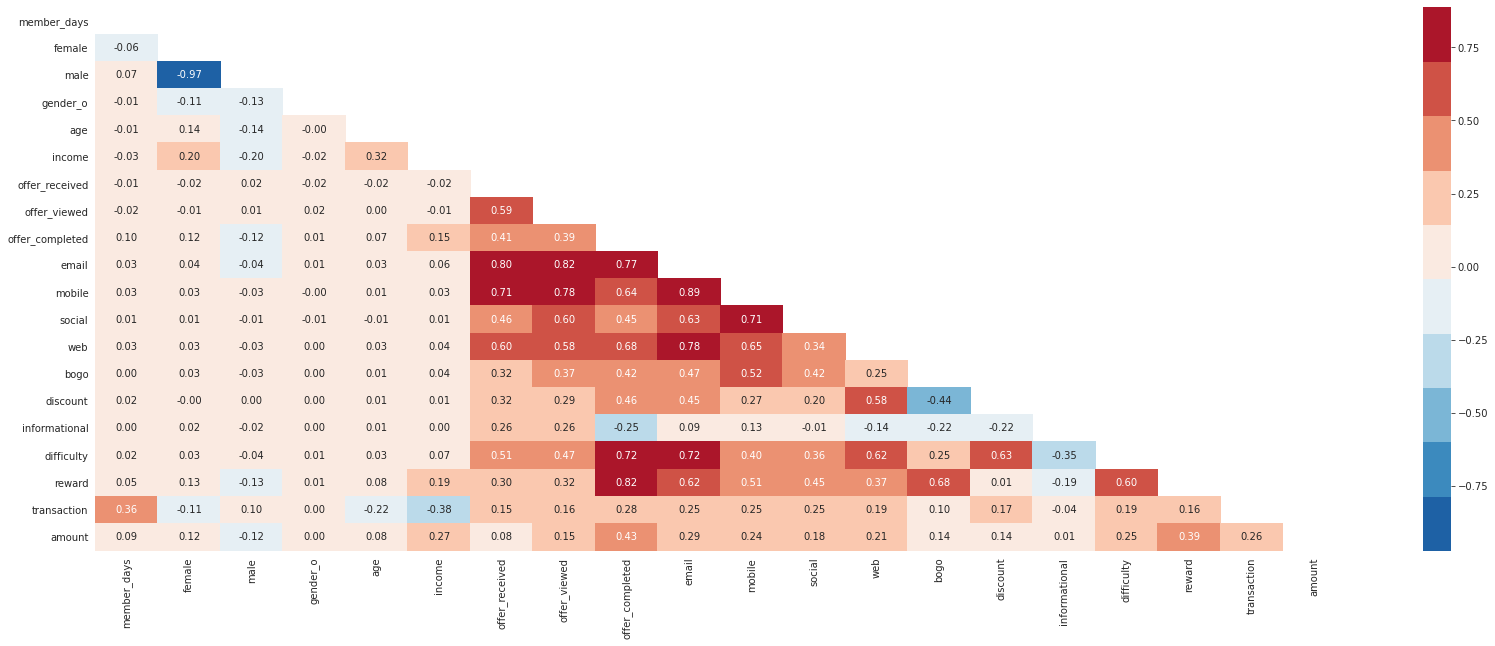

In [104]:
df_model = shuffle(df_model)
corr = df_model.corr()
mask = np.triu(corr)
cmap = sns.color_palette("RdBu_r", 10)
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize = (28, 10))
    ax = sns.heatmap(corr, mask = mask, cmap = cmap, annot = True, fmt = '.2f')

In [105]:
df_model['offer_completed'].describe()

count    11916.000000
mean         0.342716
std          0.260162
min          0.000000
25%          0.200000
50%          0.400000
75%          0.600000
max          1.000000
Name: offer_completed, dtype: float64

In [106]:
df_model['response'] = np.where(((df_model['offer_completed'] > (0.5 - 0.260162))&\
                                (df_model['offer_completed'] < (0.5 + 0.260162))), 1, 0)
df_model.drop(['offer_completed'], axis=1, inplace=True)

In [107]:
features = df_model.drop('response', axis=1)
target = df_model['response']

In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=0.2, random_state=45)


In [ ]:
eval_set = [(X_train, Y_train), (X_valid, Y_valid)]

In [ ]:
model = XGBClassifier(learning_rate=0.1, objective = 'binary:logistic')
model.fit(X_train, Y_train, eval_set=eval_set, eval_metric="auc", early_stopping_rounds=30, verbose=False)
Y_pred = model.predict(X_valid , ntree_limit=model.best_ntree_limit)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10));
plot_importance(model, ax=ax);

In [ ]:
X_train = X_train[['member_days', 'female', 'male', 'gender_o', 'age', 'income','email', 'mobile', 'social', 'web',
       'bogo', 'discount', 'reward']]

clf = MLPClassifier(solver='adam', activation='logistic',alpha=1e-4,hidden_layer_sizes=(64,64,64), \
                    random_state=45,max_iter=10000,verbose=10,tol=0.000000000001)

clf.fit(X_train, Y_train)

In [ ]:
X_valid = X_valid[['member_days', 'female', 'male', 'gender_o', 'age', 'income','email', 'mobile', 'social', 'web',
       'bogo', 'discount', 'reward']]
Y_pred = clf.predict(X_valid)

In [ ]:
accuracy_score(Y_valid, Y_pred)

In [ ]:
cm = confusion_matrix(Y_valid, Y_pred)
cm

In [ ]:
fig, ax= plt.subplots(figsize=(5,5))

confusion_matrix = pd.crosstab(Y_valid, Y_pred, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt='g', ax = ax)
ax.xaxis.set_ticklabels(['No Purchase', 'Made Purchase']); 
ax.yaxis.set_ticklabels(['No Purchase', 'Made Purchase']);
plt.show()

- Step 1: Prepare the Data
- Step 2: Define the Model
- Step 3: Train the Model
- Step 4: Evaluate the Model
- Step 5: Make Predictions

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

#### 1. Load in the data

In [ ]:
df_model = pd.read_csv('data/normalize_starbucks_data.csv')

features = df_model[['member_days', 'female', 'male', 'gender_o', 'age', 'income','email', 'mobile', 'social', 'web', 'bogo', 'discount', 'reward']]
target = df_model['amount']

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=45)

print('X_train shape: ', X_train.shape)
print('Y_train shape: ', Y_train.shape)
print('X_test shape: ', X_test.shape)
print('Y_test shape: ', Y_test.shape)

#### 2. Build the model

In [ ]:
model = Sequential([
      Dense(32, input_shape = (13,), activation='relu'),
      Dense(32, activation='relu'),
      Dropout(0.2),
      Dense(32, activation='relu'),
      Dense(1)
])

#### 3. Compile the model

In [ ]:
model.compile(optimizer='Adam',
              loss='mse',
              metrics=['mse'])

#### 4. Train the model

In [ ]:
Y_n_train = model.predict(X_test) # for plot comparesion
early_stopping = EarlyStopping(monitor='val_loss', patience = 5) 
r = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=500, callbacks = [early_stopping])

In [ ]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

#### 5. Make Predictions

In [ ]:
Y_pre = model.predict(np.array(X_test))

In [ ]:
def plot_predictions(Y_n_train, Y_pre, Y_test ):
    plt.plot(Y_n_train, Y_test, 'ro', label='Untrained Model',alpha = .4)
    plt.plot(Y_pre, Y_test, 'go', label='Trained Model',alpha = .4)
    plt.xlabel('Pred')
    plt.ylabel('Label')

    y_min = min(min(Y_test), min(Y_n_train), min(Y_pre))
    y_max = max(max(Y_test), max(Y_n_train), max(Y_pre))
    plt.xlim([y_min, y_max])
    plt.ylim([y_min, y_max])
    plt.plot([y_min, y_max], [y_min, y_max], 'b--')
    plt.legend()
    plt.show()
    
plot_predictions(Y_n_train, Y_pre, Y_test )